# Exercise 4: Extreme value analysis based on temperature data in Bern-Zollikofen

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev

## Read and prepare data for analysis
- read in the data of daily maximum temperatures at Bern-Zollikofen
- calculate 5 day running average
- extract yearly maxima of running averages

In [24]:
# read in data
# path = r'C:/Users/Nora/01_science/Teaching/ENV-410/2024/1864_2023_Bern_daily_max_temp.csv' 
# TO DO: enter path where you saved the file
path = 
df = pd.read_csv(path, index_col='time', parse_dates=['time'])

# compute 5-day running average
df['tx5d'] = df.temp_max.rolling(5).mean()

# extract yearly maxima
df = df.groupby(df.index.year).max()

## Visualize time series
It is always a good idea to plot your time series, so you have an idea what the data looks like.


Text(0.5, 0, 'Year')

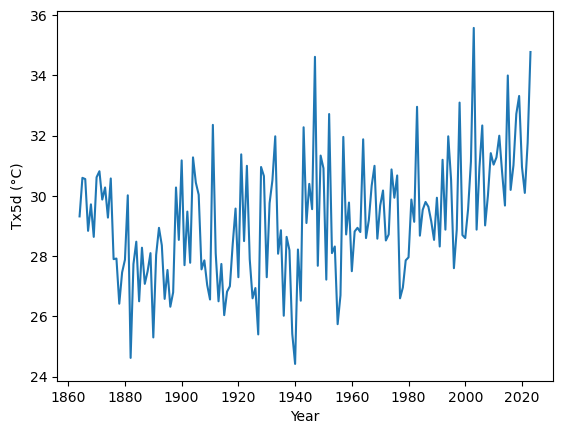

In [25]:
fig, ax = plt.subplots()
ax.plot(df.index, df.tx5d)
ax.set_ylabel('Tx5d (°C)')
ax.set_xlabel('Year')

## Basic observations

### a) In which year did the highest heatwave occur? What was the maximum 5-day temperature?

In [71]:
# TO DO: get temperature value and year of the strongest heatwave

### b) What is the empirical return period of an event with the magnitude of the 2023 heatwave? 

The empirical return period T of an event can be calculated using the following formula:

$T = \frac{N + 1}{N + 1 - \text{rank}}$

where:
- N is the total number of events in the dataset.
- rank is the rank of the event (sorted from smallest to largest).

In [72]:
# TO DO: calculate the emprical return period of the 2023 heatwave


## Fit a GEV to the data, calculate return values and visualize Gumbel diagram

The different methods of a GEV object in python can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html

In [73]:
# fit a GEV to the data and calculate return periods
fit_params = gev.fit(df.tx5d)
print(fit_params) # shows the shape, location and scale parameters

(0.17974627189918518, 28.418007567894573, 1.9162098397180793)


### c) What are the return values of the 10, 50, and 100 year return periods? Provide the values based on a GEV fit to the data and create a Gumbel diagram (return periods vs return values).

In [289]:
# TO DO: calculate return the 10, 50 and 100 year return periods
return_periods = np.array([10,50,100])
exceed_prob = 
return_values = # use appropriate gev method
return_values.round()

array([31.96, 33.79, 34.42])

In [74]:
# prepare data for plotting
# Return periods and values based on GEV fit
return_periods = np.arange(0.1,1000) # array of return periods
exceed_prob_gev = 1 / return_periods # exceedance probability for all return peridos
return_values = gev.ppf(1 - exceed_prob_gev, *fit_params) # corresponding return values (ppf expects cumulative funuction, therefore 1 - exceed_prob)

# Empirical return periods to plot on top
sorted_data = np.sort(df.tx5d) # sort data
# empirical return periods for all events
return_periods_empirical = (len(df)+1)/((len(df)+1)-np.arange(1, len(df)+1)) 

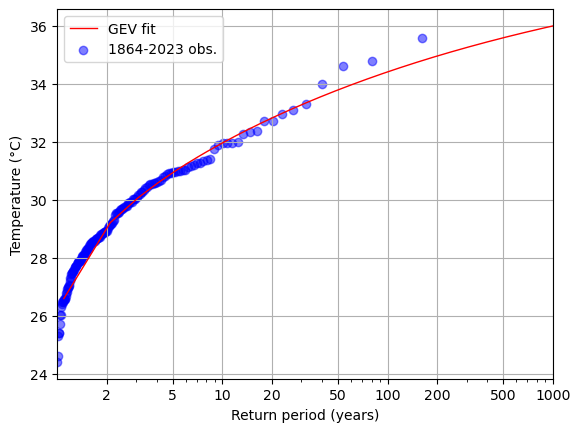

In [59]:
# create Figure
fig, ax = plt.subplots()
# TO DO: add correct data  arrays for the figure
ax.plot( ) # plot GEV fit
ax.scatter() # plot empirical data
ax.set_xscale('log')
ax.grid()
ax.set_xlabel('Return period (years)')
ax.set_ylabel('Temperature (°C)')
ax.set_xlim(1,1000)
ax.set_xticks([2,5,10,20,50,100,200,500,1000])
ax.set_xticklabels([2,5,10,20,50,100,200,500,1000])
ax.legend()
fig.savefig('return_value_plot.png', format='png', bbox_inches='tight', dpi=300)

### d) What could be a problem in estimating the return periods in that way? *Hint: Have a look at the time series.*

## Comparison of different time periods

### c) Plot the histograms of the total time period, the 1864-1893, and the 1994-2023 time periods and fit a GEV to each. How does the exceedance probability of the 2023 heatwave change in the early and late period?

In [67]:
# TO DO: fit parameters to the early and late time period
fit_params_early = 
fit_params_late = 

# get pdfs based on GEV fit parameters
x = np.linspace(23, 37, 100)
pdf_all = gev.pdf(x, *fit_params)
# TO DO: get pdf for early and late time period
pdf_early = 
pdf_late = 

In [ ]:
# create histogram
bins = np.arange(24,36)
fig, ax = plt.subplots()
# plot histograms
ax.hist(df['tx5d'], bins=bins, density=True, alpha=0.4, color='darkgrey', label='1864-2023')
# TO DO: plot histograms of early and late period

# plot fitted pdfs
ax.plot(x, pdf_all, color='darkgrey')
# TO DO: plot histograms of early and late period

# add 2023 heatwave
ax.axvline(df.loc[2023].tx5d, color='darkred', label='2023 heatwave', ls='--')

ax.set_xlim(23,37)
ax.legend(loc='upper left')
ax.set_xlabel('Temperature (°C)')
fig.savefig('histogram.png', format='png', bbox_inches='tight', dpi=300)

In [75]:
print(df.loc[2023]) # value of 2023 heatwave

# calculate probability of 2023 heatwave for total time period time period
1 - gev.cdf(df.loc[2023].tx5d, *fit_params)

temp_max    35.10
tx5d        34.78
Name: 2023, dtype: float64


0.0063697451970068375

In [283]:
# TO DO: calculate probabilites of the 2023 heatwave for the early and late time period
p_early = 
p_late= 

### d) One method of extreme event attribution compares the probability of an event occuring with climate change (p1, the factual) versus the event occuring without climate change (p0, the counterfactual), and estimates the fraction of attributable risk 

### $(FAR = p1-p0/p1)$ or the probability ratio $P=p1/p0$. 

#### i) Estimate the FAR and P based on your results in c). What statement can you make about the 2023 heatwave? 

In [ ]:
# TO DO: calculate P and FAR
P =
FAR = 

#### ii) What could be problematic about estimating the event attribution as you did in i)?